In [2]:
import pandas as pd
import numpy as np
df = pd.DataFrame(pd.read_csv("datos_ideam.csv"))
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2014-12-08 15:00,493.0,50,NaN,1200
1,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2014-12-08 16:00,85.0,50,NaN,1200
2,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2014-12-08 17:00,150.2,50,NaN,1200
3,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2014-12-08 18:00,20.8,50,NaN,1200
4,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2014-12-08 19:00,0.0,50,NaN,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49138,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2022-09-11 05:00,0.0,50,NaN,1200
49139,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2022-09-11 06:00,1.9,50,NaN,1200
49140,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2022-09-11 07:00,39.7,50,NaN,1200
49141,26125710,AEROPUERTO MATECANA [26125710],4.812675,-75.739519,1342,Sinóptica Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 09 - Cauca-Valle-Caldas,Risaralda,Pereira,...,NaN,RAD SOLAR,RSGVAL_AUT_60,Radiación solar global horaria VALIDADA,Horaria,2022-09-11 08:00,200.2,50,NaN,1200


In [3]:
ndf = df[['Fecha','Valor']].copy()
ndf['Fecha'] = pd.to_datetime(df['Fecha'])
# ndf = ndf[(ndf['Fecha'].dt.year == 2022)&(ndf['Fecha'].dt.month == 9)&(ndf['Fecha'].dt.day == 11)]

ndf

,Fecha,Valor
0,2014-12-08 15:00:00,493.0
1,2014-12-08 16:00:00,85.0
2,2014-12-08 17:00:00,150.2
3,2014-12-08 18:00:00,20.8
4,2014-12-08 19:00:00,0.0
...,...,...
49138,2022-09-11 05:00:00,0.0
49139,2022-09-11 06:00:00,1.9
49140,2022-09-11 07:00:00,39.7
49141,2022-09-11 08:00:00,200.2


In [16]:

result = []
TA = []
año=''
mes=''
dia=''
suma = 0
count=0

for a in range(2014,2023,1):
    for m in range(1,13,1):
        for d in range(1,32,1):
            count=0
            suma=0
            for h in range(0,24,1):
                datos = ndf[ndf['Fecha']==f'{a}-{m}-{d} {h}:00:00']
                datos = np.array(datos)
                if datos.size != 0:
                    # print(datos)
                    año = datos[0][0].year
                    mes = datos[0][0].month
                    dia = datos[0][0].day
                    if datos[0][1] > 0:
                        count+=1
                    suma+=datos[0][1]
                else:
                    pass
            TA = [año,mes,dia,count,suma]
            # print(TA)
            if TA[3]>0:
                result.append([TA[4]//TA[3],TA[3],f'{TA[0]}-{TA[1]}-{TA[2]}'])


result = np.array(result)
print(result)

[['149.0' '5' '2014-12-8']
 ['186.0' '14' '2014-12-9']
 ['427.0' '13' '2014-12-10']
 ...
 ['409.0' '11' '2022-9-9']
 ['192.0' '10' '2022-9-10']
 ['144.0' '4' '2022-9-11']]


In [94]:
nuevo_dataframe= pd.DataFrame(result,columns=['RadiacionMedia','Horas/Dia','Fecha'])
nuevo_dataframe

,RadiacionMedia,Horas/Dia,Fecha
0,149.0,5,2014-12-8
1,186.0,14,2014-12-9
2,427.0,13,2014-12-10
3,189.0,12,2014-12-11
4,296.0,13,2014-12-12
...,...,...,...
2193,471.0,5,2022-9-7
2194,368.0,13,2022-9-8
2195,409.0,11,2022-9-9
2196,192.0,10,2022-9-10


Text(0.5, 1.0, 'radiacion mes a mes.')

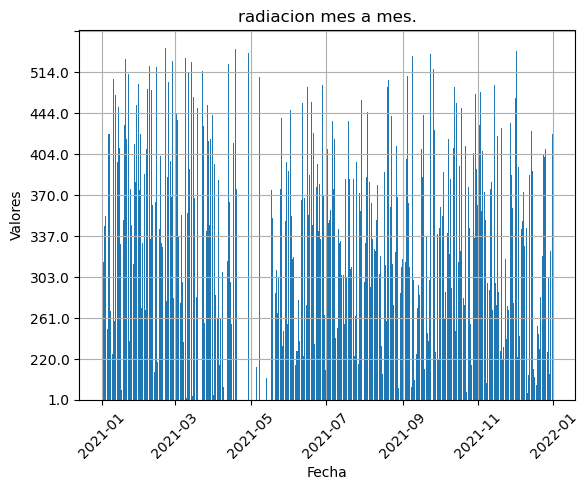

In [95]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
nuevo_dataframe['Fecha'] = pd.to_datetime(nuevo_dataframe['Fecha'], errors='coerce')
nuevo_dataframe=nuevo_dataframe[nuevo_dataframe['Fecha'].dt.year==2021]

# nuevo_dataframe

nuevo_dataframe = nuevo_dataframe.sort_values(by='RadiacionMedia')

x=nuevo_dataframe['Fecha']
y=nuevo_dataframe['RadiacionMedia']



ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # formato fecha
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  # distribuye la fecha
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))  # Máximo 10 etiquetas





plt.xticks(rotation=45)
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.bar(x,y)
plt.grid(True)
plt.title("radiacion mes a mes.")
